The following code was written by @maestro_rayo following:

https://www.medrxiv.org/content/10.1101/2020.06.26.20140814v2.full.pdf

by M. Levitt et al.



In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from math import log
from datetime import datetime, timedelta


### Get data

In [128]:
covid_data = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/total_deaths.csv", parse_dates=["date"], skiprows=[1])

Max value to date 09/16/2020 for Sweden is 5851


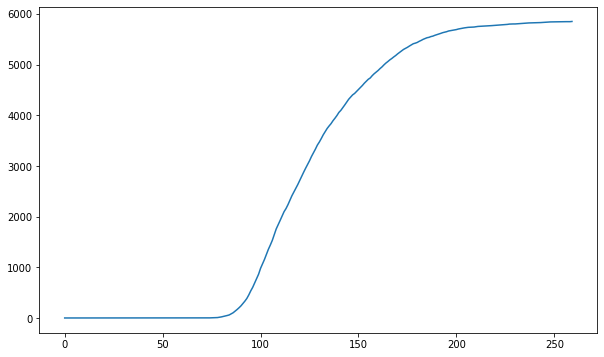

In [129]:
location = 'Sweden'
data = covid_data[location].fillna(0).astype(int)
#data = data.rolling(window=7).mean().fillna(0).astype(int)
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(data)
today = datetime.today()
print("Max value to date %s for %s is %d" % (today.strftime("%m/%d/%Y"),location,max(data)))

In [144]:
threshold = 0.99

#Assuming one would get a reasonable estimate at least at a third of the final value
max_times = 2

def ML(data, days_ago):
  data = data[:len(data)-days_ago]
  max_search = max_times*max(data)
  coeff = []

  valid_data = data[data > 0]
  coeff = []
  for N in range(max(data)+1,max(data) + max_search):
    y = -np.log(np.log(N) - np.log(valid_data.values))
    days = np.array(range(len(y)))
    correlation = np.corrcoef(days, y)[0][1]
    coeff.append(correlation)
    if (correlation >= threshold):
      break
  N= max(data) + np.argmax(coeff)
  return (N, max(coeff))

For Sweden the prediction on 09/15/2020 was 5849.
Maximum correlation 0.992573


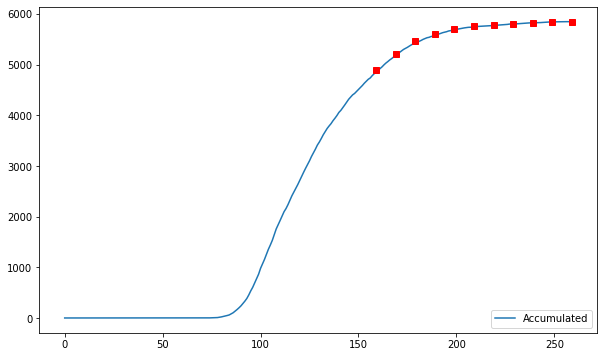

In [145]:
#What was the prediction X days ago?
plt.plot(data,label='Accumulated')

days_ago = 101

for i in range(days_ago,0,-10):
    d = today - timedelta(days=i)
    prediction, max_coeff = ML(data,i)
    #plt.plot([prediction]*len(data),label='Prediction')
    plt.plot(len(data)-i,prediction,marker='s', color='r')

plt.legend(loc="lower right")

print("For %s the prediction on %s was %d.\nMaximum correlation %f" % (location,d.strftime("%m/%d/%Y"),prediction,max_coeff))